In [146]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns


## Carga de dataset

In [147]:
df = pd.read_csv('insurance.csv')

## Exploración de datos

In [148]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [149]:
df.count()

age         348
sex         348
bmi         348
children    348
smoker      348
region      348
charges     348
dtype: int64

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       348 non-null    int64  
 1   sex       348 non-null    int64  
 2   bmi       348 non-null    float64
 3   children  348 non-null    int64  
 4   smoker    348 non-null    int64  
 5   region    348 non-null    int64  
 6   charges   348 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 19.2 KB


In [151]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,39.591954,0.508621,30.676552,1.091954,0.232759,1.497126,14016.426293
std,14.417015,0.500646,5.625850,1.192021,0.423198,1.104089,12638.887852
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1137.011000
25%,27.000000,0.000000,26.782500,0.000000,0.000000,1.000000,4888.466125
50%,40.000000,1.000000,30.300000,1.000000,0.000000,2.000000,9719.305250
75%,53.000000,1.000000,34.777500,2.000000,0.000000,2.000000,19006.316150
max,64.000000,1.000000,49.060000,5.000000,1.000000,3.000000,51194.559140


In [152]:
df.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

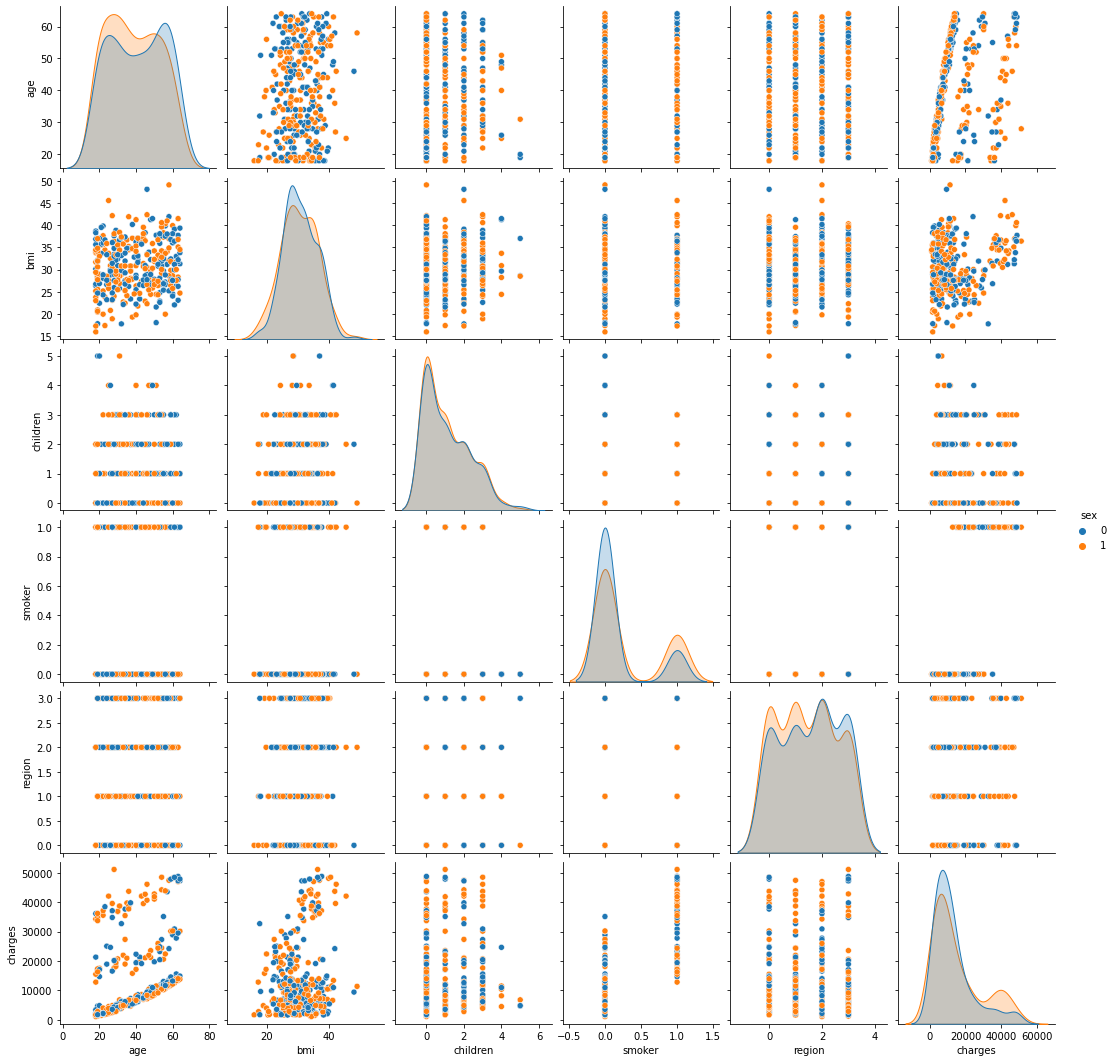

In [153]:
sns.pairplot(data=df, hue='sex')

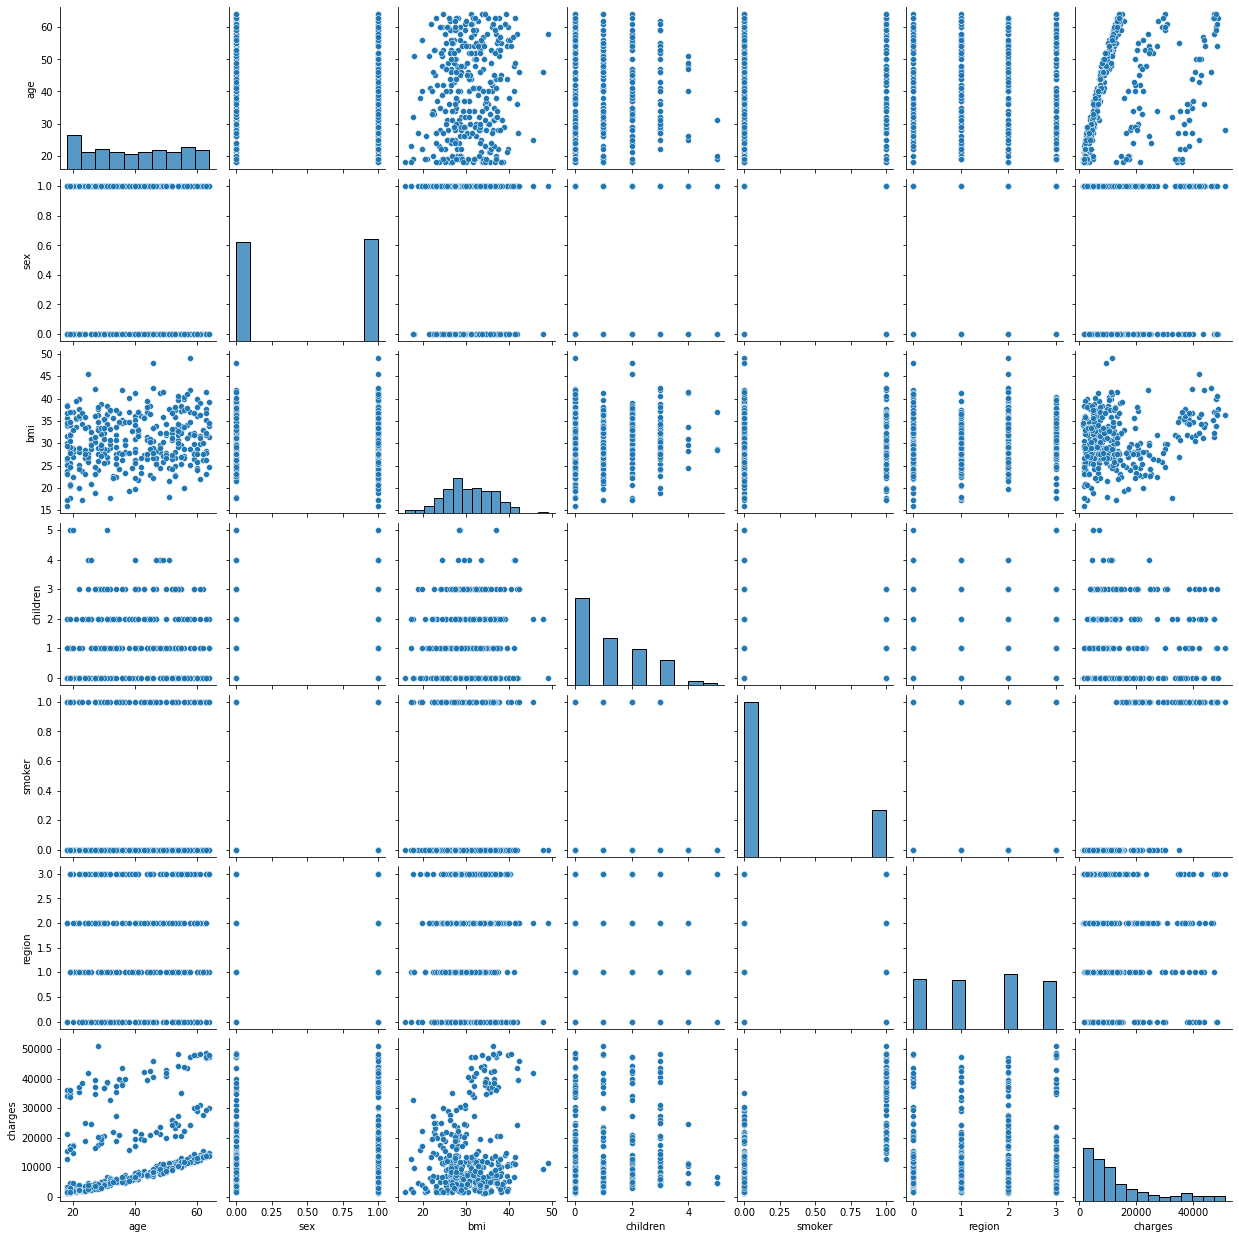

In [154]:
sns.pairplot(df[['age','sex','bmi','children','smoker','region','charges']])
#age	sex	bmi	children	smoker	region	charges

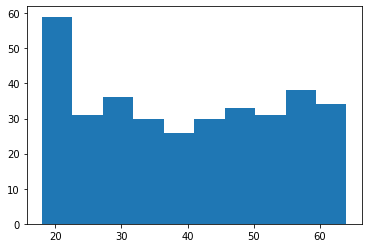

In [155]:
_ = plt.hist(df.age)

## Preparación de los datos - datos categóricos

In [156]:
lbl_encoder = preprocessing.LabelEncoder()
lbl_encoder.fit(df['smoker'])
lbl_encoder.fit(df['sex'])

hot_encoder = preprocessing.OneHotEncoder()
hot_encoder.fit(df[['region']])

OneHotEncoder()

## Dividir en training y test

In [157]:
tg = df['charges']
df = df.drop(columns=['charges'])
df = df[['bmi']]

X_train, X_test, y_train, y_test = train_test_split(df, tg,  test_size=0.33, random_state=42)

## Preparación de los datos - escala

In [158]:
sc = preprocessing.StandardScaler()
sc.fit(df)

StandardScaler()

## Modelación lineal

In [160]:
# implementación manual Algoritmo least squares

x_mean = np.mean(X_train.values)
y_mean = np.mean(y_train.values)
xy = 0
x2 = 0

for i in range(len(X_train.values)):
    xy += (X_train.values[i] - x_mean) * (y_train.values[i] - y_mean)
    x2 += (X_train.values[i] - x_mean) ** 2
    
d = xy / x2
m = y_mean - (d * x_mean)

print(d, m)

[360.63886989] [2200.00276819]


# Evaluación de los modelos

In [161]:
# Algoritmo least squares
x_mean = np.mean(X_train.values)
y_mean = np.mean(y_train.values)

for i in range(len(X_train.values)):
    xy += (X_train.values[i] - x_mean) * (y_train.values[i] - y_mean)
    x2 += (X_train.values[i] - x_mean) ** 2
    d = numer / denom
    m = y_mean - (d * x_mean)

# libreria LinearRegression de sklearn
ln_regression = LinearRegression()
ln_regression.fit(X_train, y_train)

# libreria Lasso de sklearn
las = Lasso(alpha=0.1)
las.fit(X_train, y_train)

print('Coeficientes: ', d, m)

Coeficientes:  [360.63886989] [2200.00276819]


In [162]:
#RMSE

rmse = 0
for i in range(len(X_train.values)):
    y_pred = m + d * X_train.values[i]
    rmse += (y_train.values[i] - y_pred) ** 2
rmse = np.sqrt(rmse/len(X_train.values))
print("RMSE")
print(rmse)

RMSE
[11859.35945209]


In [163]:
ss_tot = 0
ss_res = 0
for i in range(len(X_train.values)):
    y_pred = m + d * X_train.values[i]
    ss_tot += (y_train.values[i] - y_mean) ** 2
    ss_res += (y_train.values[i] - y_pred) ** 2
r2 = 1 - (ss_res/ss_tot)
print("r^2")
print(r2)

r^2
[0.02719106]


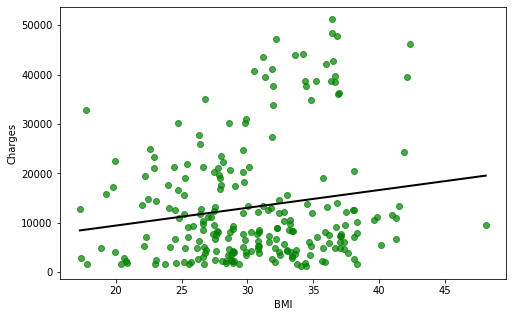

In [167]:
Xmax = np.max(X_train.values)
Xmin = np.min(X_train.values)
 
posx = np.linspace(Xmin, Xmax, 1000)
posy = m + d * posx

plt.figure(figsize=(8,5))
plt.plot(posx, posy, color='black', linewidth=2)
plt.scatter(X_train.values, y_train.values,  alpha=0.7, color ='green')

plt.ylabel('Charges')
plt.xlabel('BMI')

plt.show()

In [168]:
# Linear Regression
# Coeficientes
regression.coef_

array([504.68015386])

In [169]:
# MAE
mean_absolute_error(regression.predict(X_test), y_test)

10402.86580400414

In [170]:
# MSE
mean_squared_error(regression.predict(X_test), y_test)

172131274.1527312

In [171]:
# RMSE
r2_score(regression.predict(X_test), y_test)

-18.897278629980942

In [190]:
Xconst = sm.add_constant(X_test.values)
stat = sm.OLS(y_test.values, Xconst)
print(stat.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     9.310
Date:                Tue, 20 Apr 2021   Prob (F-statistic):            0.00284
Time:                        23:37:12   Log-Likelihood:                -1253.1
No. Observations:                 115   AIC:                             2510.
Df Residuals:                     113   BIC:                             2516.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4326.2261   6678.642     -0.648      0.5

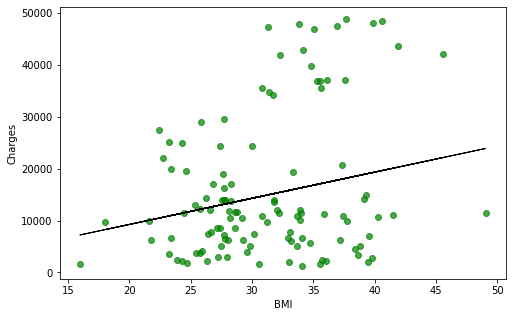

In [174]:
plt.figure(figsize=(8,5))
plt.scatter(X_test, y_test, alpha=0.7, color='green')
plt.plot(X_test, regression.predict(X_test), color='black', linewidth=1)

plt.xlabel('BMI')
plt.ylabel('Charges')

plt.show()

In [175]:
# Lasso
lasso.coef_

array([504.67675516])

In [176]:
lasso.intercept_

-848.037917279351

## Regresión Polinomial

In [183]:
pf = PolynomialFeatures()

pftrain = pf.fit_transform(X_train)

pftest = pf.fit_transform(X_test)

linreg = LinearRegression()
linreg.fit(pftrain, y_train)

print('mean_squared_error: ' + str(mean_squared_error(linreg.predict(pftest), y_test)))

print('r2_score: ' +str(r2_score(linreg.predict(pftest), y_test)) )


mean_squared_error: 178400981.33205682
r2_score: -32.76869446231884



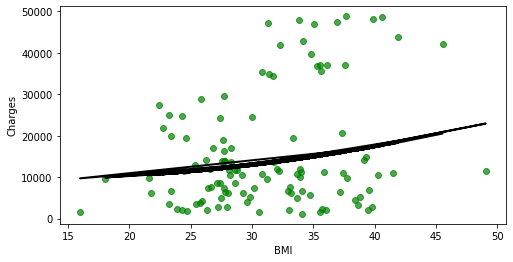

In [184]:
plt.figure(figsize=(8,4))
plt.scatter(X_test, y_test, alpha=0.7, color='green')
plt.plot(X_test, pl.predict(poly_test), '-r', color='black', linewidth=2)

plt.xlabel('BMI')
plt.ylabel('Charges')

plt.show()